In [1]:
from numpy import array

from keras.preprocessing.text import one_hot
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences

from keras.models import Sequential

from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers import Dense



In [2]:

# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']



In [3]:

# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])

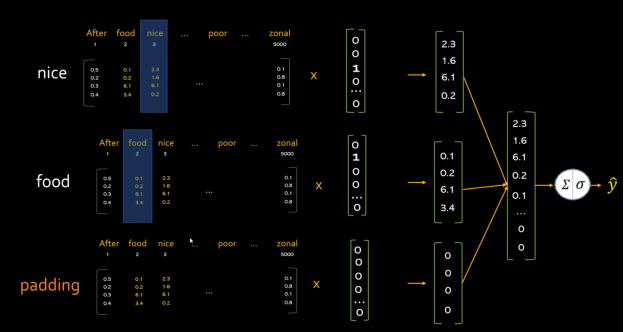

In [4]:

# integer encode the documents
vocab_size = 50

encoded_docs = [one_hot(d, vocab_size) for d in docs]

print(encoded_docs)


[[16, 36], [2, 45], [37, 10], [46, 45], [47], [6], [46, 10], [16, 2], [46, 45], [43, 47, 36, 12]]


In [48]:
# find the voab for this corpus

#encoded_docs.vocab


AttributeError: 'list' object has no attribute 'vocab'

In [5]:

# pad documents to a max length of 4 words

max_length = 4

padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

print(padded_docs)

[[16 36  0  0]
 [ 2 45  0  0]
 [37 10  0  0]
 [46 45  0  0]
 [47  0  0  0]
 [ 6  0  0  0]
 [46 10  0  0]
 [16  2  0  0]
 [46 45  0  0]
 [43 47 36 12]]


In [55]:
??Embedding

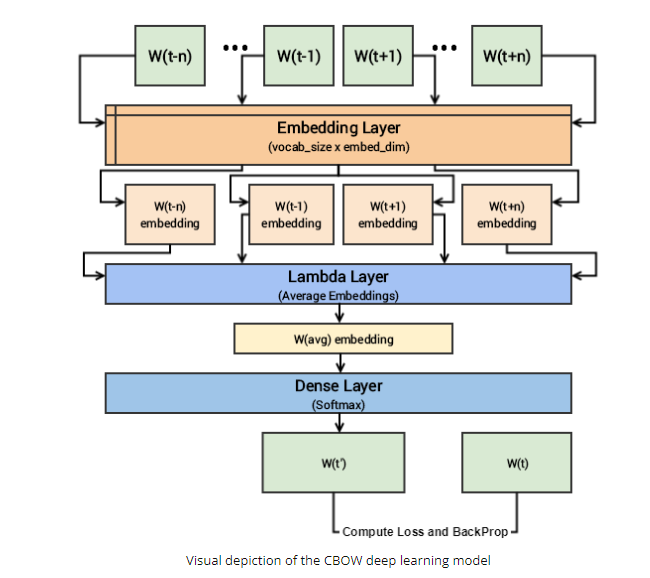

In [24]:
embedded_vector_size=8

# define the model
model = Sequential()

model.add(Embedding(input_dim=vocab_size, input_length=max_length, output_dim=embedded_vector_size,name="abc"))

model.add(Flatten())  # instead we can also usE LAMBDA LAYER

model.add(Dense(1, activation='sigmoid'))


In [25]:

# compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
# summarize the model

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              400       
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [28]:

# fit the model

model.fit(padded_docs, labels, epochs=50, verbose=2)



Epoch 1/50
1/1 - 0s - loss: 0.6515 - accuracy: 0.8000 - 13ms/epoch - 13ms/step
Epoch 2/50
1/1 - 0s - loss: 0.6504 - accuracy: 0.8000 - 5ms/epoch - 5ms/step
Epoch 3/50
1/1 - 0s - loss: 0.6494 - accuracy: 0.8000 - 11ms/epoch - 11ms/step
Epoch 4/50
1/1 - 0s - loss: 0.6483 - accuracy: 0.8000 - 6ms/epoch - 6ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6472 - accuracy: 0.8000 - 8ms/epoch - 8ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6462 - accuracy: 0.8000 - 6ms/epoch - 6ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6451 - accuracy: 0.8000 - 15ms/epoch - 15ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6440 - accuracy: 0.8000 - 5ms/epoch - 5ms/step
Epoch 9/50
1/1 - 0s - loss: 0.6429 - accuracy: 0.8000 - 9ms/epoch - 9ms/step
Epoch 10/50
1/1 - 0s - loss: 0.6417 - accuracy: 0.8000 - 7ms/epoch - 7ms/step
Epoch 11/50
1/1 - 0s - loss: 0.6406 - accuracy: 0.8000 - 6ms/epoch - 6ms/step
Epoch 12/50
1/1 - 0s - loss: 0.6395 - accuracy: 0.8000 - 5ms/epoch - 5ms/step
Epoch 13/50
1/1 - 0s - loss: 0.6383 - accuracy: 0.8000 - 5ms/epoch 

In [11]:

# evaluate the model

loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)

print('Accuracy: %f' % (accuracy*100))


Accuracy: 80.000001


In [54]:
model.get_layer("embedding").get_weights()[0][6]

array([ 0.07885756, -0.09613948,  0.09025447,  0.10154791, -0.10751146,
       -0.05964573,  0.15599452, -0.06981585], dtype=float32)

# predict

In [42]:

# define documents
docs = ['very good',
		'average work',
		'Bad effort',
		'really nice effort']

        

In [43]:

# integer encode the documents
vocab_size = 50

encoded_docs = [one_hot(d, vocab_size) for d in docs]

print(encoded_docs)


[[45, 2], [49, 45], [22, 10], [34, 46, 10]]


In [44]:

# pad documents to a max length of 4 words

max_length = 4

test_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

print(test_docs)

[[45  2  0  0]
 [49 45  0  0]
 [22 10  0  0]
 [34 46 10  0]]


In [45]:
output = model.predict(test_docs)

output

1/1 [==============================] - 0s 48ms/step


array([[0.526937  ],
       [0.5965272 ],
       [0.50371355],
       [0.51349956]], dtype=float32)

In [46]:

for i in output:
    if i>.51:
        print(1)
    else:
        print(0)

1
1
0
1
